In [1]:
"""

Your name (Your uniID):
Hongxiang Zhang u7101924
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result

In [3]:
def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [4]:
# Parameters, add more if needed
sigma = 2
thresh = 0.07
k=0.05

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

bw = plt.imread('Harris_1.jpg')
r, g, b = bw[:,:,0], bw[:,:,1], bw[:,:,2]
bw = 0.2989 * r + 0.5870 * g + 0.1140 * b
bw = np.array(bw * 255, dtype=int)
# computer x and y derivatives of image

Ix = conv2(bw, dx)
Iy = conv2(bw, dy)

In [5]:
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal

In [6]:
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

# 2,3

In [7]:
######################################################################
# Task: Compute the Harris Cornerness
######################################################################
def harris_corner(bw,Ix2,Iy2,Ixy,k,thresh):
    height,width = bw.shape
    result,R,Rmax = np.zeros((height,width)),np.zeros((height,width)),0 # init R matrix, result matrix which record where the corner is, init Rmax as 0

    for i in range(height):
        for j in range(width):
            M = np.zeros((2,2))
            M[0,0],M[0,1],M[1,0],M[1,1]=Ix2[i,j],Ixy[i,j],Ixy[i,j],Iy2[i,j] # For each pixel init the Covariance matrix of gradient
            R[i,j] = np.linalg.det(M) - k*(np.dot(np.trace(M),np.trace(M))) # calculate the R value
            if R[i,j]>Rmax:
                Rmax = R[i,j] # find the max R value

    ######################################################################
    # Task: Perform non-maximum suppression and
    #       thresholding, return the N corner points
    #       as an Nx2 matrix of x and y coordinates
    ######################################################################
    #  compare whith threshold
    count = 0;
    for i in range(2,height-2):
        for j in range(2,width-2):
            if R[i,j] > thresh*Rmax: # using Rmax*0.02 as threshold
                result[i,j] = 1
                count = count +1
    for i in range(2,height-2):
        for j in range(2,width-2):
            if result[i,j]==1:
                tmp = R[i-1:i+1,j-1:j+1]
                if R[i,j]!=tmp.max(): # perform non-maximum suppression
                    result[i,j]=0
                    count-=1

    x,y =[],[]
    for i in range(3,height-10):
        for j in range(3,width-10):
            if result[i,j]==1:
                x.append(i)
                y.append(j)
    return x,y

# 4

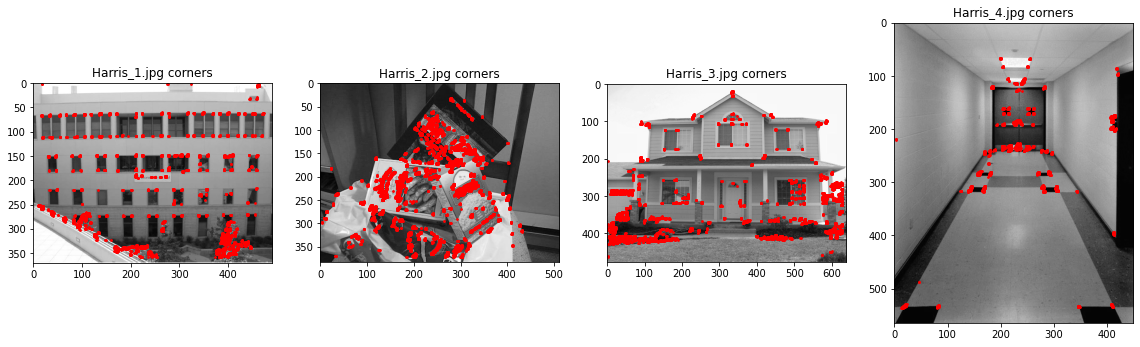

In [10]:
# Parameters, add more if needed
sigma = 2
thresh = 0.01
k=0.05

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal

files = ['Harris_1.jpg','Harris_2.jpg','Harris_3.jpg','Harris_4.jpg']
plt.figure(figsize=(30, 6))
num = 1
for i in files:
    bw = plt.imread(i)
    if len(bw.shape)!=2:
        r, g, b = bw[:,:,0], bw[:,:,1], bw[:,:,2]
        bw = 0.2989 * r + 0.5870 * g + 0.1140 * b
        bw = np.array(bw * 255, dtype=int)
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)
    g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal
    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)
    plt.subplot(1,6,num)
    num+=1
    x,y = harris_corner(bw,Ix2,Iy2,Ixy,k,thresh)
    plt.imshow(bw,cmap='gray')
    plt.title(i+ ' corners')
    plt.scatter(y,x,color='red',s=3)

# 5

Harris_1.jpg
1
(370, 492)
Harris_2.jpg
(384, 512)
Harris_3.jpg
1
(476, 640)
Harris_4.jpg
1
(565, 450)


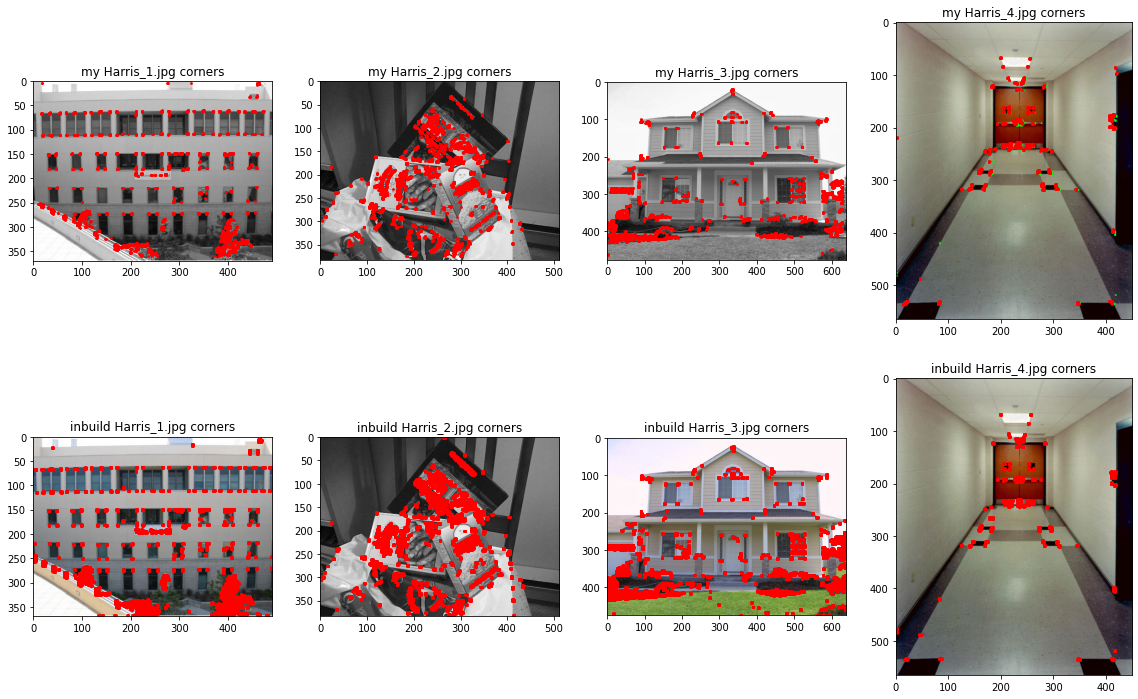

In [15]:
# Parameters, add more if needed
sigma = 2
thresh = 0.01
k=0.05

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

files = ['Harris_1.jpg','Harris_2.jpg','Harris_3.jpg','Harris_4.jpg']
plt.figure(figsize=(30, 12))
num = 1
for i in files:
    print('processing '+i)
    bw = plt.imread(i)
    if len(bw.shape)!=2:
        r, g, b = bw[:,:,0], bw[:,:,1], bw[:,:,2]
        bw = 0.2989 * r + 0.5870 * g + 0.1140 * b
        bw = np.array(bw * 255, dtype=int)
    
    img = plt.imread(i)
    if len(img.shape)!=2:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    inbuild = cv2.cornerHarris(gray,2,3,k)
    inbuild = cv2.dilate(inbuild, None)
    fig = img.copy()
    x,y =[],[]
    width,height = gray.shape
    for p in range(2,width-2):
        for q in range(2,height-2):
            if inbuild[p,q]>thresh*inbuild.max():
                x.append(p)
                y.append(q)
    plt.subplot(2,6,num+6)
    plt.title('inbuild '+i+ ' corners')
    plt.imshow(fig,cmap='gray')
    plt.scatter(y,x,color='red',s=3)
    
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)
    g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal
    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)
    
    plt.subplot(2,6,num)
    num+=1
    x,y = harris_corner(bw,Ix2,Iy2,Ixy,k,thresh)
    plt.imshow(bw,cmap='gray')
    plt.title('my '+i+ ' corners')
    plt.scatter(y,x,color='red',s=3)


img = plt.imread('Harris_4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
inbuild = cv2.cornerHarris(gray,2,3,k)
inbuild = cv2.dilate(inbuild, None)
fig = img.copy()
fig[inbuild > 0.01*inbuild.max()] = [0,255,0]

plt.imshow(fig,cmap='gray')

# 6

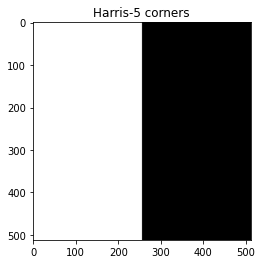

In [15]:
bw = plt.imread('Harris-5.jpg')

Ix = conv2(bw, dx)
Iy = conv2(bw, dy)
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

x,y = harris_corner(bw,Ix2,Iy2,Ixy,k,thresh)
plt.imshow(bw,cmap='gray')
plt.title('Harris-5 corners')
plt.scatter(y,x,color='red',s=3)

# 7

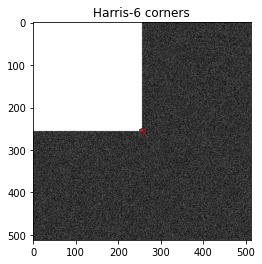

In [11]:
# Parameters, add more if needed
sigma = 2
thresh = 0.07
k=0.05

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

bw = plt.imread('Harris-6.jpg')

Ix = conv2(bw, dx)
Iy = conv2(bw, dy)
g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma) # return a gaussian kernal
Iy2 = conv2(np.power(Iy, 2), g)
Ix2 = conv2(np.power(Ix, 2), g)
Ixy = conv2(Ix * Iy, g)

x,y = harris_corner(bw,Ix2,Iy2,Ixy,k,thresh)
plt.imshow(bw,cmap='gray')
plt.title('Harris-6 corners')
plt.scatter(y,x,color='red',s=3)